# Lab7 Example
## Example I
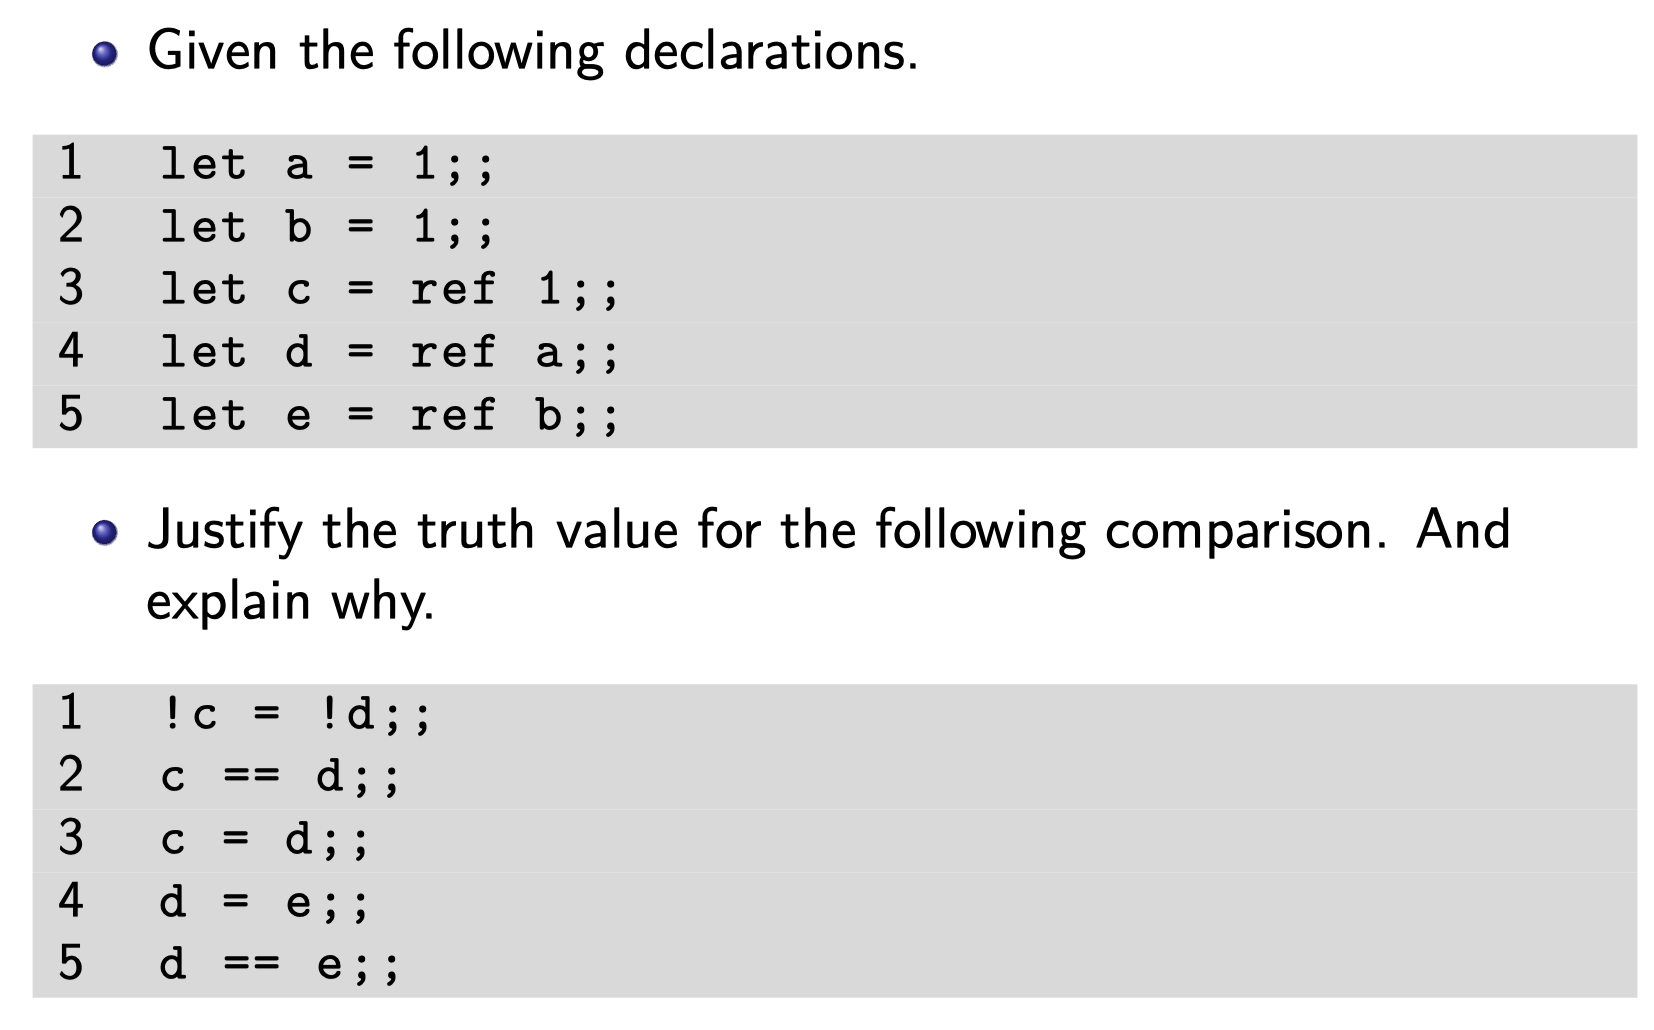

In [3]:
let a = 1;; 
let b = 1;; 
let c = ref 1;; 
let d = ref a;; 
let e = ref b;;

val a : int = 1


val b : int = 1


val c : int ref = {contents = 1}


val d : int ref = {contents = 1}


val e : int ref = {contents = 1}


In [9]:
!c = !d;; (*check value not address*)
c == d;; (*check address*)
c = d;; (*c is ref 1, d is ref 1*)
d = e;; (*d is ref 1, e is ref 1*)
d == e;; (*check if d and e are equal*)
a==b;;

- : bool = true


- : bool = false


- : bool = true


- : bool = true


- : bool = false


- : bool = true


## Example II
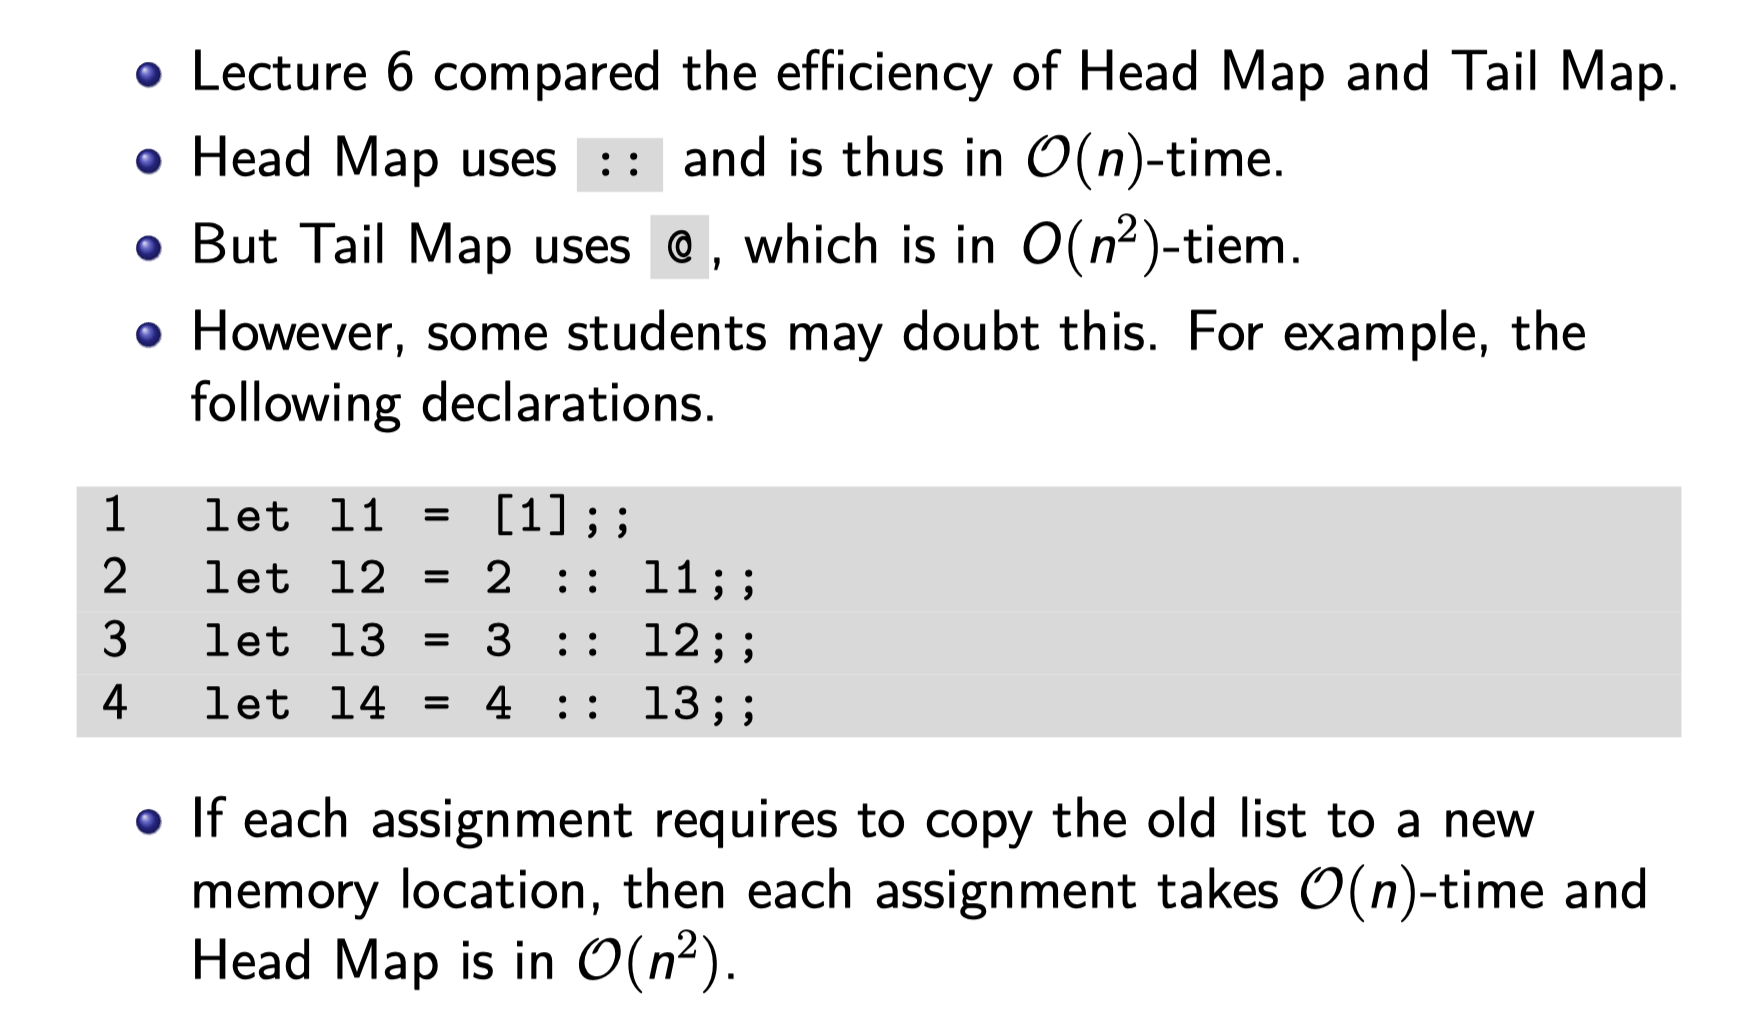

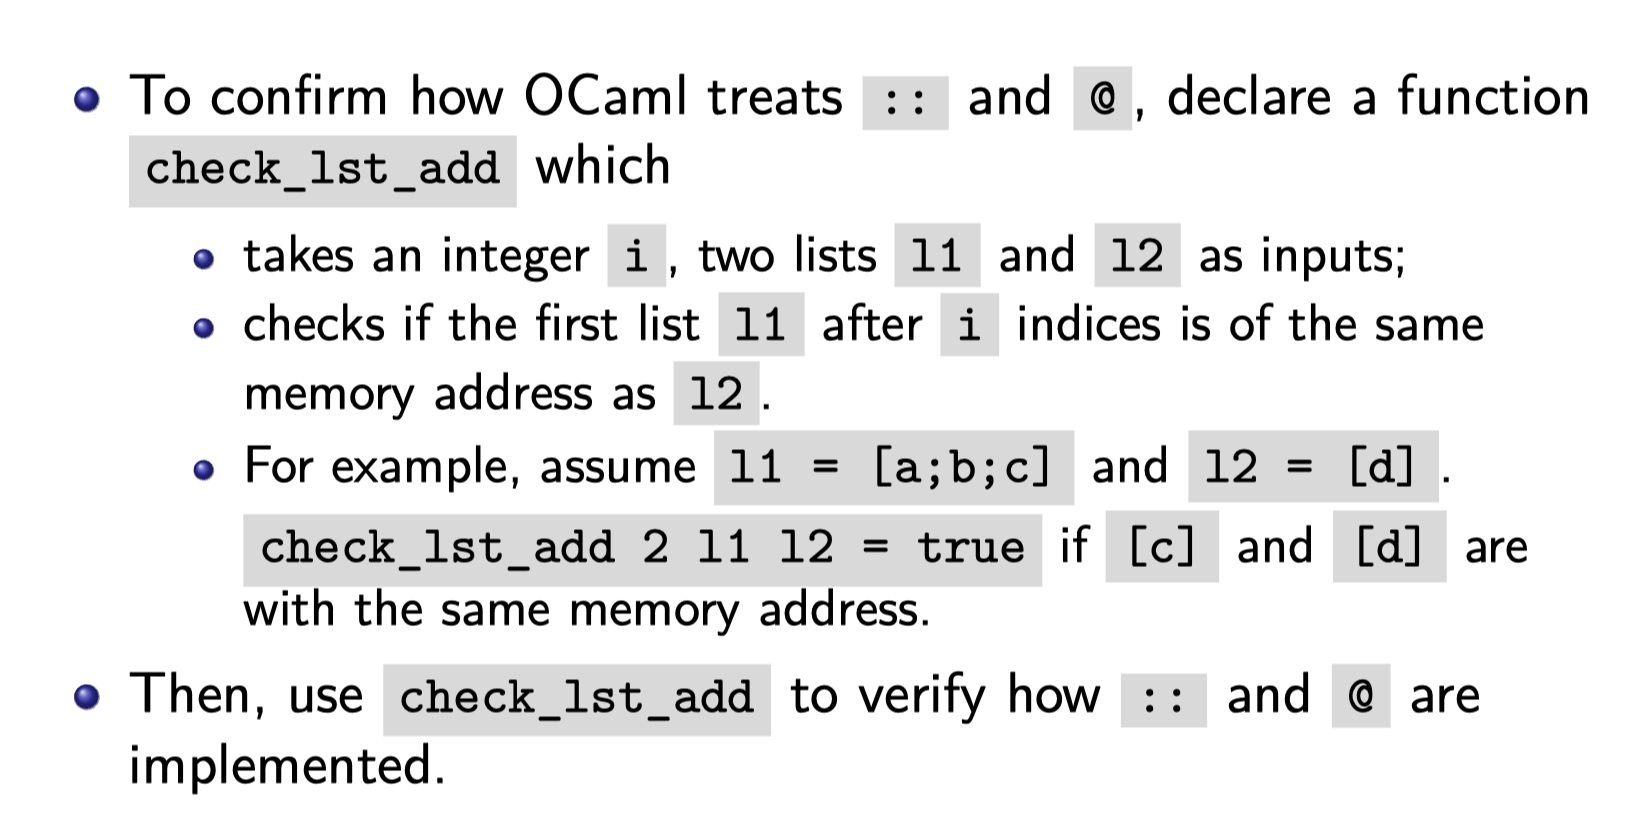

In [10]:
(*Page 4 List Construction*)
exception Negative_Index;;
let rec check_lst_add i l1 l2 =
  if i = 0 then l1 == l2
  else if i < 0 then raise Negative_Index
  else
    match l1 with
    | [] -> false 
    | _ :: t -> check_lst_add (i - 1) t l2;;

let l1 = [1;2;3];;
let l2 = 0 :: l1;;


let l3 = [0] @ l1;;
let l4 = l1 @ l1 @ l1;;

l1;;
l2;;

check_lst_add 1 l2 l1;;


exception Negative_Index


val check_lst_add : int -> 'a list -> 'a list -> bool = <fun>


val l1 : int list = [1; 2; 3]


val l2 : int list = [0; 1; 2; 3]


val l3 : int list = [0; 1; 2; 3]


val l4 : int list = [1; 2; 3; 1; 2; 3; 1; 2; 3]


- : int list = [1; 2; 3]


- : int list = [0; 1; 2; 3]


- : bool = true


## Example III

-  Implement fib to calculate Fibonacci numbers by loops.

In [ ]:
let fib n = 
  let i =ref 0 in 
  let fa =ref 1 in 
  let fb =ref 1 in
  while !i<n do
    let temp = !fa in
    fa := !fb;
    fb := temp + !fb;
    i := !i + 1
  done;
  !fa
;;

fib 0;;
fib 1;;
fib 2;;
fib 3;;

val fib : int -> int = <fun>


- : int = 1


- : int = 1


- : int = 2


- : int = 3


## Example IV

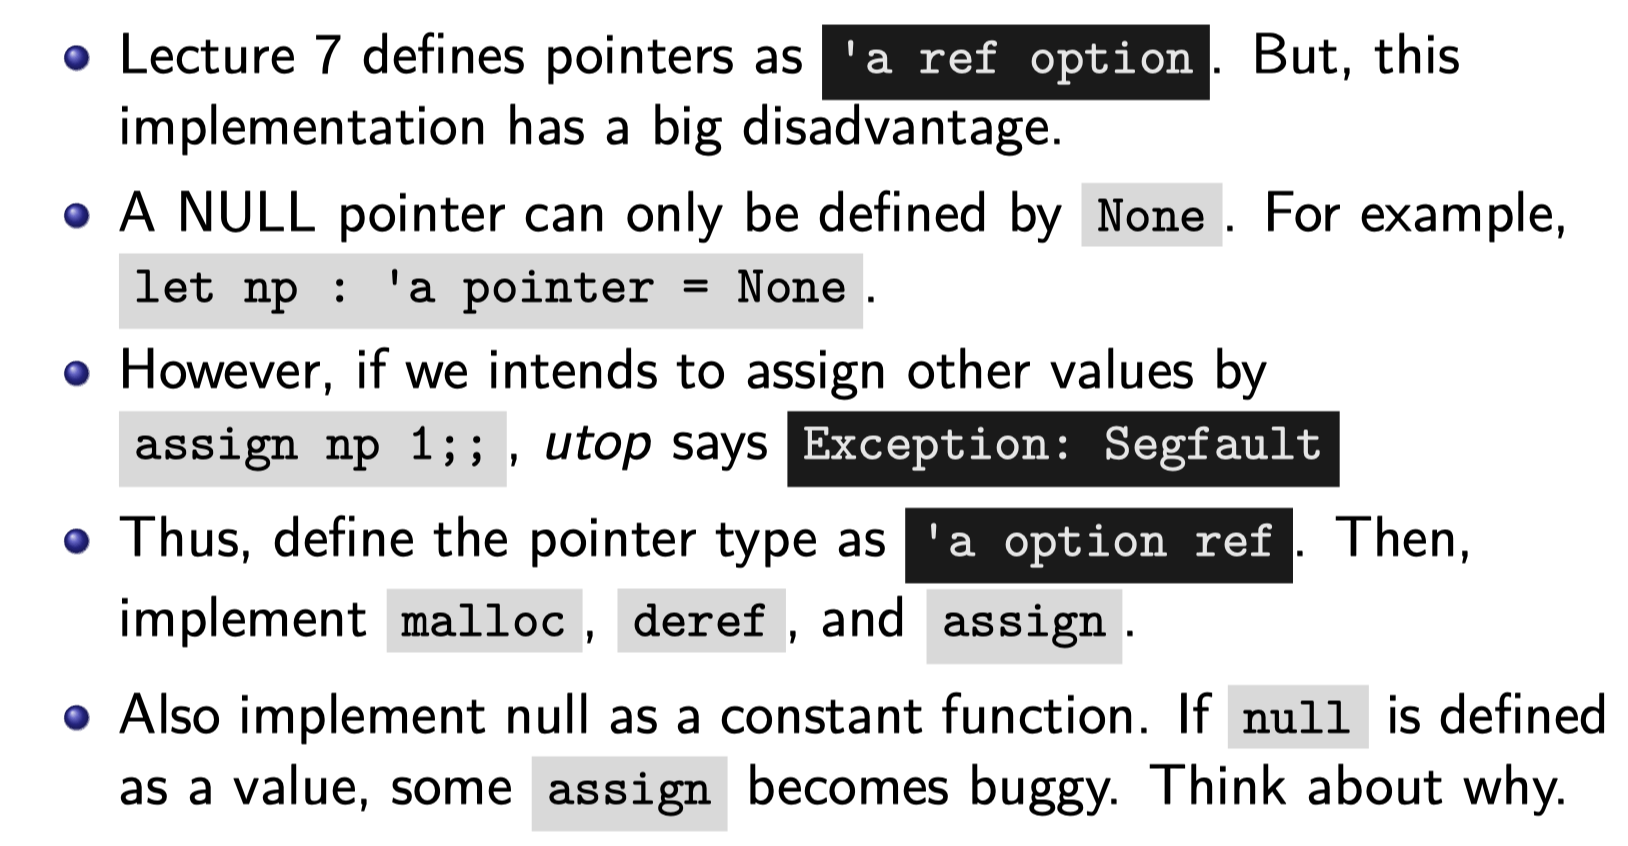

In [ ]:
type 'a pointer = 'a ref option;; 

let malloc x = Some (ref x);;

exception Segfault;; 

let deref x = match x with | None -> raise Segfault | Some r -> !r;; 
let assign p v = match p with | None -> raise Segfault | Some r -> r := v;;

type 'a pointer = 'a ref option


val malloc : 'a -> 'a ref option = <fun>


exception Segfault


val deref : 'a ref option -> 'a = <fun>


val assign : 'a ref option -> 'a -> unit = <fun>


In [ ]:

type 'a pointer = 'a option ref;; (* 定义一个通用指针类型 *)
exception Segfault;;(* 定义一个空指针异常 *)
let malloc x : 'a pointer = ref (Some x);; (* 分配内存并初始化一个指针 *)
let null x : 'a pointer = ref None;; (* 返回一个空指针 *)
let deref x = (* 解引用一个指针 *)
  match !x with 
  | None -> raise Segfault
  | Some r -> r;;
let assign p v = p := Some v;; (* 赋值给一个指针 *)


type 'a pointer = 'a option ref


exception Segfault


val malloc : 'a -> 'a pointer = <fun>


val null : unit -> 'a pointer = <fun>


val deref : 'a option ref -> 'a = <fun>


val assign : 'a option ref -> 'a -> unit = <fun>


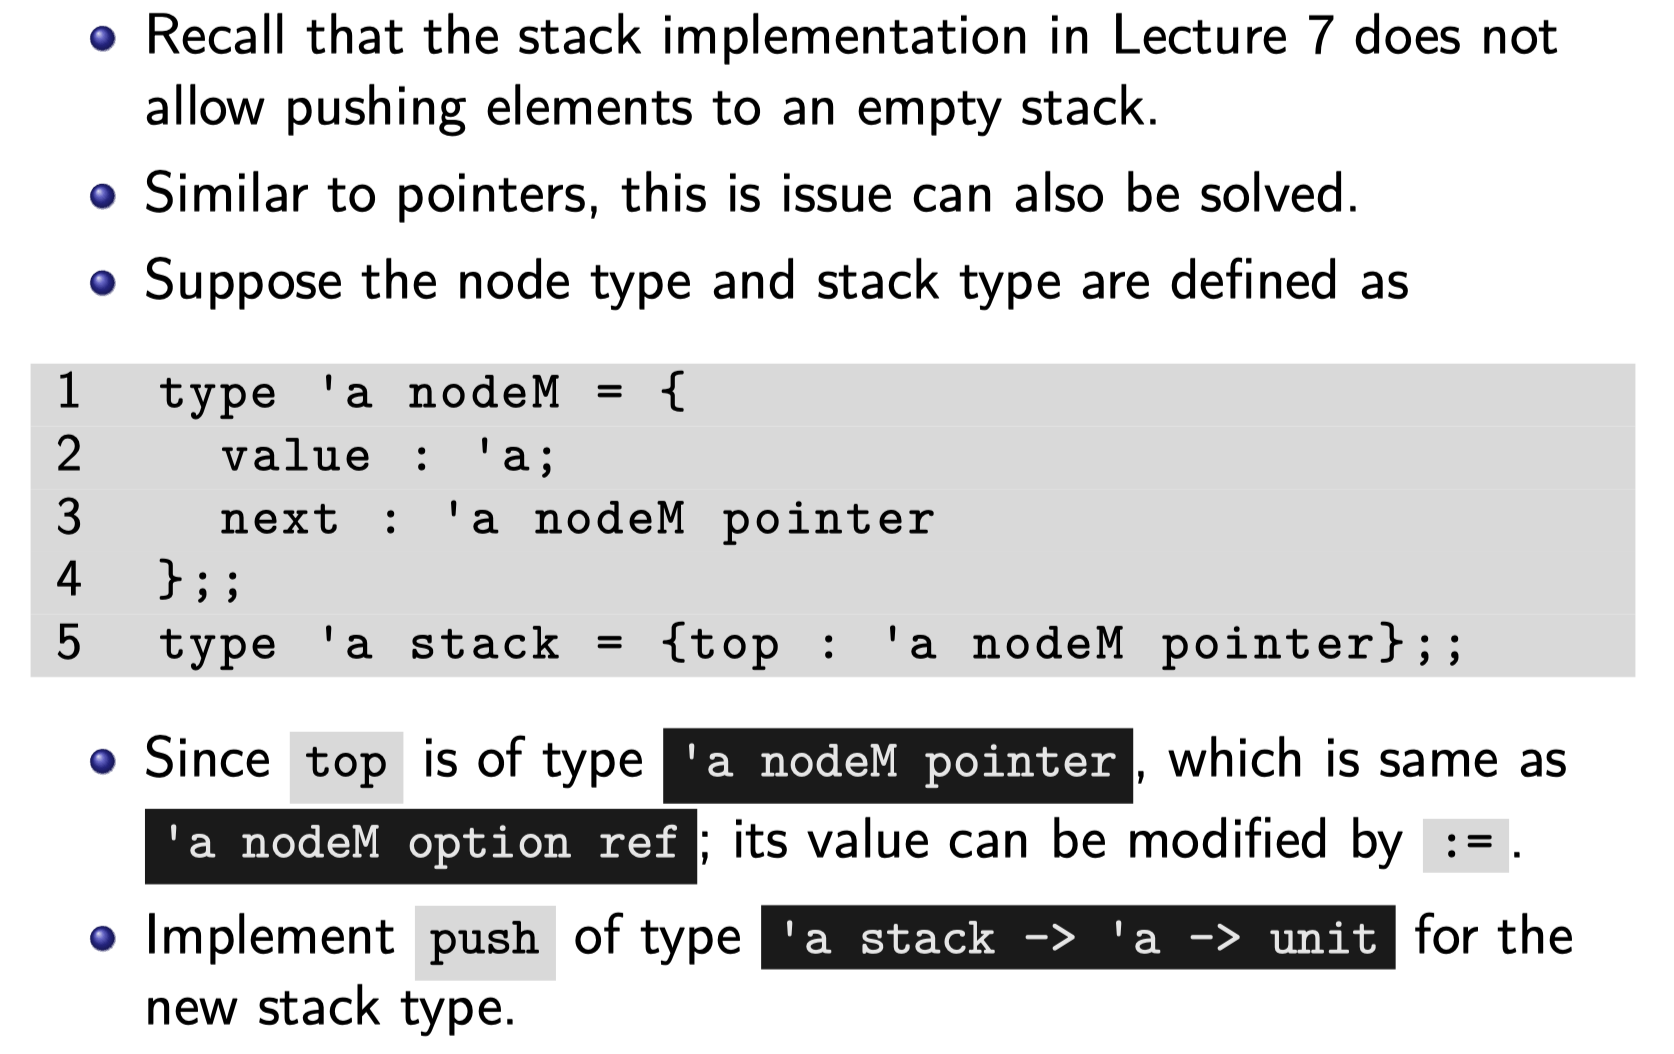

In [4]:
type 'a nodeM = { value : 'a; next : 'a nodeM pointer };; 
type 'a stack = {top : 'a nodeM pointer};;

exception EmptyStack;;

let push (s:'a stack) v =
  match !(s.top) with
  | None -> s.top := Some {value = v; next = ref None} 
  | Some n -> 
    let new_node = {value = v; next = malloc n} in (* create a new node*)
    s.top :=  Some new_node;; (* update the top pointer*)

let pop (s:'a stack) =
  match !(s.top) with
  | None -> raise EmptyStack
  | Some n ->let v = n.value in
     s.top := !(n.next);
    v;;


type 'a nodeM = { value : 'a; next : 'a nodeM pointer; }


type 'a stack = { top : 'a nodeM pointer; }


exception EmptyStack


val push : 'a stack -> 'a -> unit = <fun>


val pop : 'a stack -> 'a = <fun>


In [103]:
let s = {top = ref None};;
push s 1;;
push s 2;;
push s 3;;

pop s;;
pop s;;
pop s;;

val s : '_weak5 stack = {top = {contents = None}}


- : unit = ()


- : unit = ()


- : unit = ()


- : int = 3


- : int = 2


- : int = 1
